In [2]:
#%run -i '../scripts/utility_readblt.py' 'mumu'

In [1]:
from utility_common import *
from utility_plotter import *
from utility_templatefitter_multiselector import *

from IPython.display import clear_output

## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

# 1. electron

### 1.1 Load Template and Target

In [4]:
v,a,b,step = "lepton2_pt",0,200,5
ee   = Template(v,a,b,step,selection="ee", nbjetcut=">=1")
v,a,b,step = "nBJets",0,4,1
ee2   = Template(v,a,b,step,selection="ee", nbjetcut=">=1")

templatelist = [ee,ee2]
#etau = Template(v,a,b,step,selection="etau",nbjetcut=">=1")
#emu  = Template(v,a,b,step,selection="emu",  nbjetcut=">=1")
#e4j  = Template(v,a,b,step,selection="e4j",  nbjetcut=">=1")

In [5]:
template,templatevar2,target,targetvar2 = [],[],[],[]

for tp in templatelist: #[ee]:#,etau,emu,e4j]:
    mchist,mcvar2,datahist,datavar2 = tp.maketemplate()
    
    template.append(mchist)
    templatevar2.append(mcvar2)
    target.append(datahist)
    targetvar2.append(datavar2)

### 1.2 Fit Template to Target

In [6]:
tfit = TemplateFitter(template,templatevar2,
                      target,   targetvar2,
                      lock = [1,0,1,0]
                     )
for i in range(tfit.adjust.size):
    print('adjust{:2} is {:6.3f} +/- {:6.3f}'.format(i, tfit.adjust[i], tfit.sigma[i]) )

adjust 0 is  1.000 +/-  0.039
adjust 1 is  0.852 +/-  0.202
adjust 2 is  1.000 +/-  0.013
adjust 3 is  0.946 +/-  0.016


# Plot Result

### 2.1 Check a plot

In [7]:
selection,nbjetcut  = "ee",">=1"
pickledir  =  "../data/pickle/{}/".format(selection)
cuts = GetSelectionCut(selection) + "& (nBJets{})".format(nbjetcut)

Data = LoadDataframe(pickledir + "data2016").query(cuts)
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

if selection == "emu":
    Data = Data.drop_duplicates(subset=['runNumber', 'evtNumber'])

df_list = [MCzz,MCdy,MCt,MCtt,Data]

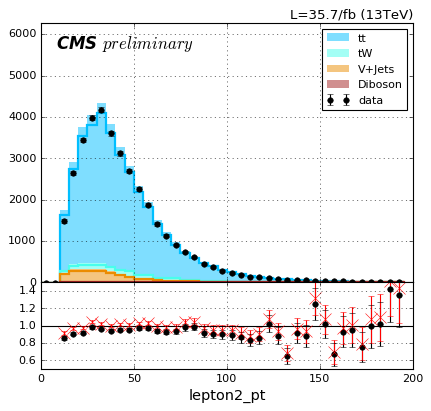

In [8]:
v,a,b,step,xl = "lepton2_pt",0,200,5,"lepton2_pt"

plotter = FitPlotter(v,a,b,step,df_list,adjust=tfit.adjust)
plotter.settingPlot(xl,label_list,color_list)
plotter.plotFittingResult()

### 2.2 Plot all

In [10]:
pp = pd.read_csv("plotter/plotparameters.csv")
#pp = pd.read_csv("plotter/plotparameters4j.csv")
for index, row in pp.iterrows():
    adj = tfit.adjust
    v,a,b,step,xl = row["var"], row["lower"], row["upper"], row["step"], row["xlabel"]
    plotter = FitPlotter(v,a,b,step,df_list,adjust=tfit.adjust)
    plotter.settingPlot(xl,label_list,color_list)
    plotter.plotFittingResult("../plot/{}/fit/".format(selection))
    
    # print out process
    print("making plots: {0}/{1}".format(index,len(pp)))
    clear_output(wait=True)
    plt.close()

making plots: 32/33
